## Урок 2. Домашнее задание 

### 2.1 Домашнее задание начального уровня

Вычислите евклидово расстояние между кластером *c1* и кластером *c3*. Это расстояние получилось меньше, или больше чем расстояние между кластером *c1* и кластером *c2*?

Координаты центра для трёх кластеров:

* "красный" кластер $c_1 = [1.0, 1.5]$
* "оранжевый" кластер $c_2 = [-1.0, -0.5]$
* "зеленый" кластер $c_3 = [1.0, -0.5]$

![clustering_example](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_example.png)

In [2]:
from scipy.spatial.distance import euclidean

c1 = [1.0, 1.5]
c2 = [-1.0, -0.5]
c3 = [1.0, -0.5]

dist1 = euclidean(c1, c2)
dist2 = euclidean(c1, c3)

print(f'c1 и c2: {dist1:.4f}')
print(f'c1 и c3: {dist2:.4f}')

# Расстояние между c1 и c3 меньше, чем c1 и c2

c1 и c2: 2.8284
c1 и c3: 2.0000


В этом уроке мы познакомились с постановкой задачи кластеризации. Мы узнали, с помощью какой функции можно вычислить расстояние между двумя точками. В следующем уроке мы рассмотрим один из самых простых алгоритмов кластеризации, который назовём алгоритмом $k-$средних.

## Урок 4. Домашнее задание 

### 4.1 Домашнее задание начального уровня

Потренируйтесь в программировании на python. Надо будет найти расстояние от каждой точки из массива $X$ до центра кластера, а потом просуммировать эти расстояния. Это будет реализацией библиотечной функции `sklearn.metrics.pairwise.euclidean_distances` из первого урока.  В итоге у Вас должно получиться число чуть более $16$ - это и будет расстояние.
$$
\sum_{i=1}^{k} \mid x_i - c \mid
$$

где для одного обучающего примера x, состоящего из двух координат:
$$
\mid x - c \mid = (x_1-c_1)^2 + (x_2-c_2)^2
$$

**Примечание** Как вы уже знаете из урока про линейную регрессию, в этой формуле должен быть квадратный корень, но для скорости работы мы опускаем его.

**Подсказка** Средствами библиотеки numpy реализуйте формулу нахождения суммы внутрикластерных расстояний

In [14]:
import numpy as np

clust = np.array([
 [-0.5972191612445694, -0.5919098916910581],
 [-1.5838020751869848, 0.4743393635868491],
 [-1.892642118066139, -1.2770390481464395],
 [-1.021761443519372, -0.38446059106320013],
 [-0.628271339507516, -2.308149346281125],
 [-0.7180915776856387, 1.1805550909358404],
 [-1.543143767548152, -1.4163791359687334],
 [0.022103701018375554, -1.1279478858865397],
 [-0.7776518874305778, -0.4157532453316538],
 [-1.2073577296008344, -1.1308523658604184]
])

centroid = np.array([-0.9774245525274352, -0.032635425821084516])

euclidean = [[0, 0]]
for cluster in clust:
    distance = (cluster - centroid)**2
    euclidean += distance

np.sum(euclidean)

16.31211696438564

### 4.2 Домашнее задание начального уровня  

Обучите алгоритм k-средних для количества кластеров $n=3$ на том же датасете, который содержится в файле `data/clustering.pkl`. Визуализируйте результат:

In [59]:
import warnings
warnings.filterwarnings("ignore")

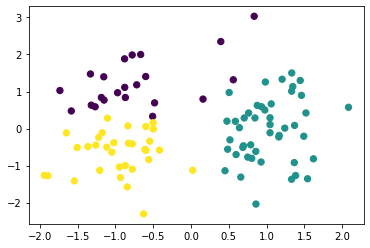

In [16]:
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

with open ('../clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_model = kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1], s=40, marker='o', c=kmeans_model.labels_)
plt.show()

### 4.3 Домашнее задание высокого уровня

Мы узнали про эвристику, улучшающую алгоритм: запустить несколько раз алгоритм, запомнить, куда попали центроиды при каждом запуске, а потом усреднить координаты за все несколько запуска.

Попробуйте применить эту эвристику на практике: 

* используйте 10 запусков алгоритма $k$-средних для $k=2$ с параметрами
<pre>
kmeans_model = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
</pre>
* в каждом запуске сохраняйте координаты центроидов общий массив $c$. См. `cluster_centers_ : array, [n_clusters, n_features]`
* визуализируйте координаты точек из $c$ на фоне исходного множества точек

Результат будет примерно такой:
![several_init_knn](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/several_init_knn.png)

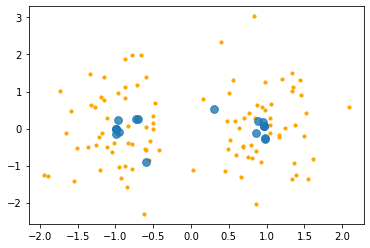

In [83]:
X = np.array(data_clustering['X'])

kmeans = KMeans(n_clusters=2, n_init=1, random_state=None, algorithm='full', max_iter=2)
kmeans_model = kmeans.fit(X)

centroids_x = []
centroids_y = []

for i in range(1, 10):
    kmeans_model = kmeans.fit(X)
    
    centroids = kmeans.cluster_centers_
    centroids_x.append(np.array(centroids[:,0]))
    centroids_y.append(np.array(centroids[:,1]))
    
plt.scatter(X[:, 0], X[:, 1], s=10, marker='o', c='orange')
plt.scatter(centroids_x, centroids_y, s=60, alpha=0.8)

Мы выяснили, что один из недостатков алгоритма k-средних состоит в том, что количество кластеров надо задать до тренировки модели, но как же определить, сколько будет кластеров в данных? Для этой задачи существует эффективный алгоритм, о котором мы поговорим в следующем уроке.

## Урок 8. Домашнее задание начального уровня


Обучите модель DBSCAN с параметром *min_samples=8*. Визуализируйте результат.

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN

In [3]:
with open('../clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])

In [6]:
db = DBSCAN(eps=0.6, min_samples=8)
db_model = db.fit(X)

labels = db_model.labels_

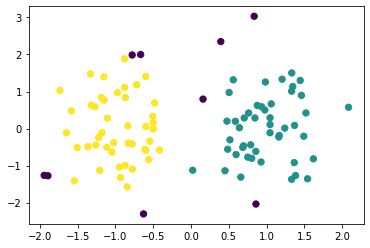

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=labels, marker='o')
plt.show()

-------------------------------------------------------------------------------------------------

Мы теперь мы знаем уже два алгоритма кластеризации -  *k-means* и *DBSCAN*. Как же выяснить, какой алгоритм построил лучшую модель? Для этого надо бы придумать какие-то метрики для кластеризации. О том, как померять качество кластеризации, мы узнаем в следующем уроке

## Урок 10. Домашнее задание 

### 10.1 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
import numpy as np
import pickle

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
with open('../clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans_model = kmeans.fit(X)

In [7]:
score = silhouette_score(X, kmeans_model.labels_)
print(f'Качество кластеризации с 4 кластерамипо метрике силуэтта: {score:.3f}')

Качество кластеризации с 4 кластерамипо метрике силуэтта: 0.443


In [8]:
kmeans = KMeans(n_clusters=2)
kmeans_model = kmeans.fit(X)

In [10]:
score = silhouette_score(X, kmeans_model.labels_)
print(f'Качество кластеризации с 2 кластерамипо метрике силуэтта: {score:.3f}')

Качество кластеризации с 2 кластерамипо метрике силуэтта: 0.447


In [11]:
# Метрика говорит о том, что 2 кластера подходят лучше, чем 4


### 10.2 Домашнее задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше по метрике AMI?

In [13]:
import numpy as np
import pickle

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score

In [14]:
with open('../clustering.pkl', 'rb') as f:
    data_clustering = pickle.load(f)
    
X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [15]:
kmeans = KMeans(n_clusters=4)
kmeans_model = kmeans.fit(X)

In [19]:
score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')
print(f'Качество кластеризации с 4 кластерамипо метрике силуэтта: {score:.3f}')

Качество кластеризации с 4 кластерамипо метрике силуэтта: 0.584


In [20]:
kmeans = KMeans(n_clusters=2)
kmeans_model = kmeans.fit(X)

In [21]:
score = adjusted_mutual_info_score(Y, kmeans_model.labels_, average_method='arithmetic')
print(f'Качество кластеризации с 4 кластерамипо метрике силуэтта: {score:.3f}')

Качество кластеризации с 4 кластерамипо метрике силуэтта: 0.929


In [22]:
# Метрика говорит о том, что 2 кластера подходят лучше, чем 4


### 10.3 Домашнее задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import adjusted_mutual_info_score

In [37]:
df = pd.read_csv('7.10_clustering_hw.csv')
df.head()

,x1,x2,y
0,6.221343,4.968753,2
1,7.360892,8.857455,2
2,-0.108178,4.730723,1
3,3.127358,1.927986,0
4,-0.817259,6.759974,1


In [34]:
X = df.drop('y', axis=1).values
Y = df['y'].values

In [41]:
metrics = []
MAX_CLUSTERS = 8


for cluster_num in range(1, MAX_CLUSTERS):
    kmeans = KMeans(n_clusters=cluster_num, random_state=99)
    kmeans_model = kmeans.fit(X)
    centroids, labels = kmeans_model.cluster_centers_, kmeans_model.labels_
    
    metric = 0
    for centroid_label in range(cluster_num):
        metric += euclidean_distances(
            X[labels == centroid_label],
            centroids[centroid_label, :].reshape(1, -1)
        ).sum(axis=0)[0]
    print(f'cluster_num: {cluster_num}, metric: {metric:.4f}')
    metrics.append(metric)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


cluster_num: 1, metric: 1105.8974
cluster_num: 2, metric: 663.5712
cluster_num: 3, metric: 374.6590
cluster_num: 4, metric: 348.1705
cluster_num: 5, metric: 324.0798
cluster_num: 6, metric: 303.5899
cluster_num: 7, metric: 285.5093


best cluster num: 3


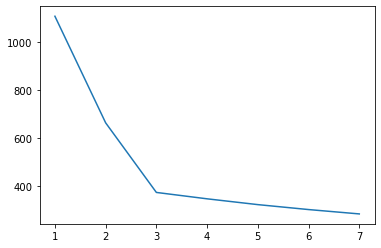

In [42]:
D = []
for i in range(0, len(metrics) - 1):
    d = abs(metrics[i+1] - metrics[i]) / abs(metrics[i] - metrics[i-1])
    D.append(d)

print(f'best cluster num: {np.argmin(D) + 1}')

plt.plot([i+1 for i in range(len(metrics))], metrics)
plt.show()

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans_model = kmeans.fit(X)

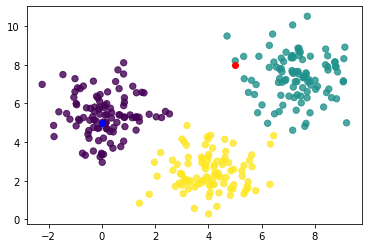

In [55]:
plt.scatter(X[:, 0], X[:, 1], s=40, c=kmeans_model.labels_, marker='o', alpha=0.8)
plt.scatter(5, 8, c='red')
plt.scatter(0, 5, c='blue')
plt.show()

# Точка (5, 8) относится к одному кластеру, а точка (0, 5) к другому

In [53]:
score = adjusted_mutual_info_score(Y, kmeans_model.labels_)
print(f'Качество модели по метрике AMI: {score:.3f}')

Качество модели по метрике AMI: 0.970


### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)